# Decision Tree Exercise
The purpose of this notebook is to familiarize in working with Decision Tree Regression.

## Initial Setup

### Import Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Score Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit

### Stylistics

In [2]:
%matplotlib inline
plt.style.use("dark_background")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("precision", 2)

### Import the Dataset

In [3]:
wine = pd.read_csv("./winequality-red.csv")

### Exploring the Dataset

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


## EDA

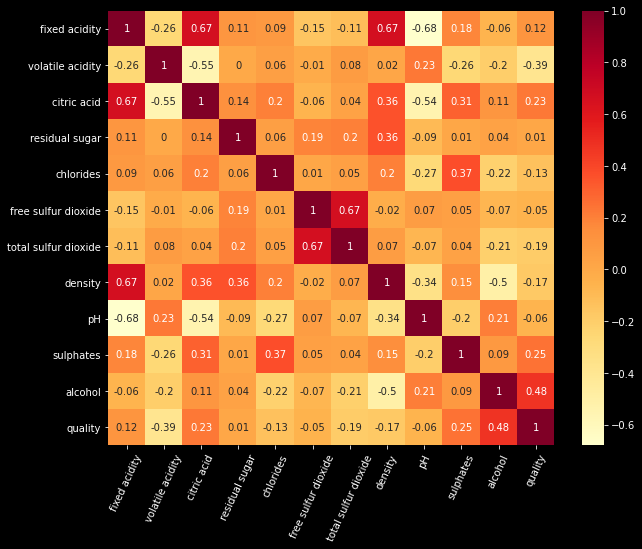

In [7]:
ax, figure = plt.subplots(figsize=(10, 8))
correlation_matrix = wine.corr().round(2)
_ = sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd")
_ = plt.xticks(rotation=65)

Based ont he produced plot, quality and alcohol seems to have a high correlation other than the rest.

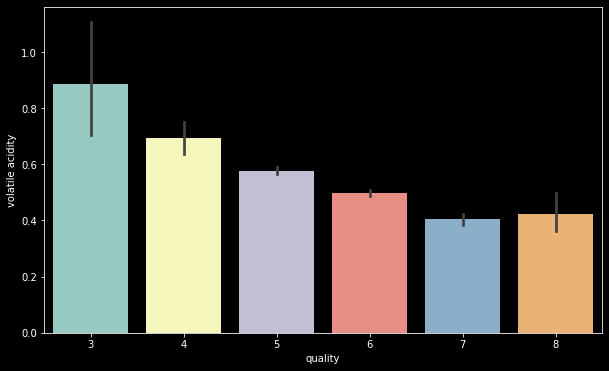

In [8]:
fig = plt.figure(figsize = (10,6))
_ = sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

We can see here that as volatile acidity goes down, quality goes up!

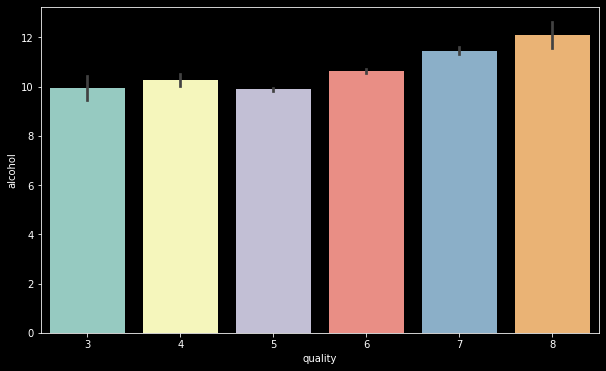

In [9]:
fig = plt.figure(figsize = (10,6))
_ = sns.barplot(x = 'quality', y = 'alcohol', data = wine)

quality goes a bit higher when alcohol increases.

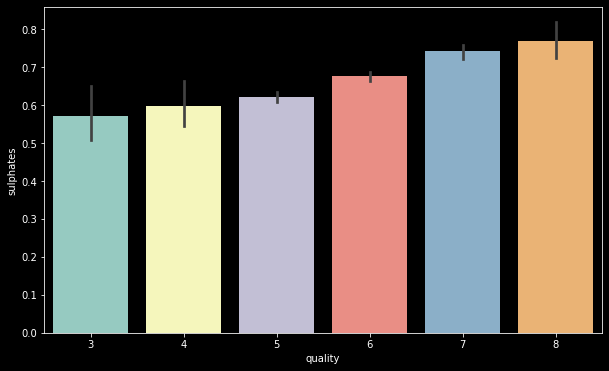

In [10]:
fig = plt.figure(figsize = (10,6))
_ = sns.barplot(x = 'quality', y = 'sulphates', data = wine)

Same thing happens with sulfates, but with much improvement.

## Preprocessing for ML Algorithm

### Binning

In [11]:
bins = (2, 6.5, 8) # Values based on Min Median Max of `quality`
bin_labels = ["bad", "good"]
wine["quality"] = pd.cut(wine["quality"], bins=bins, labels=bin_labels)

In [12]:
wine["quality"].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

### Encode Categorical Values

In [13]:
enc = LabelEncoder()

In [14]:
wine["quality"] = enc.fit_transform(wine["quality"])

In [15]:
wine["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/home/prince/Github/Machine Learning Journey/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


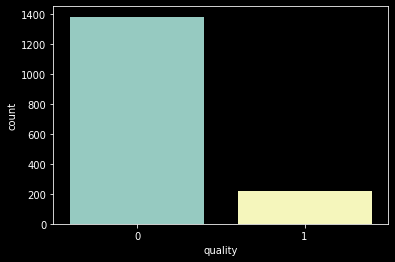

In [16]:
_ = sns.countplot(wine["quality"])

`0` for bad and `1` for good.

### Splitting the Dataset

In [17]:
X = wine.drop("quality", axis=1)
y = wine["quality"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [19]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree Model

In [20]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

tree_test_pred = tree.predict(X_test)

acc_train = tree.score(X_train, y_train)*100
acc_test = tree.score(X_test, y_test)*100

print("# ------------TRAIN DATA---------------- #")
print("Train Score: {:.2f}".format(acc_train))
print("Test Score: {:.2f}".format(acc_test))

# ------------TRAIN DATA---------------- #
Train Score: 89.21
Test Score: 86.56


In [21]:
print(confusion_matrix(y_test, tree_test_pred))

[[263  10]
 [ 33  14]]


In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["bad", "good"], feature_names=wine.drop("quality", axis=1).columns, impurity=False, filled=True)

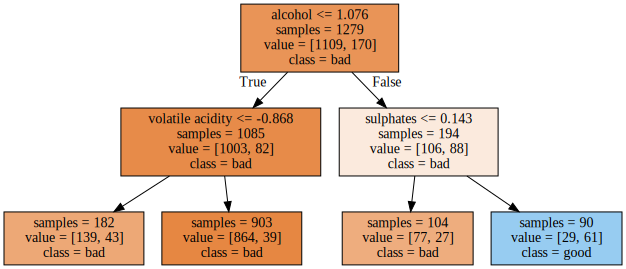

In [23]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Random Forest Model

In [24]:
rfc = RandomForestClassifier(n_estimators=7).fit(X_train, y_train)

acc_train = rfc.score(X_train, y_train)*100
acc_test = rfc.score(X_test, y_test)*100

print("# ------------METRICS---------------- #")
print("Train Score: {:.2f}".format(acc_train))
print("Test Score: {:.2f}".format(acc_test))

# ------------METRICS---------------- #
Train Score: 99.14
Test Score: 89.06


Here we got overfitting with a test score of 89.06

## Support Vector Classifier

In [25]:
svc = SVC().fit(X_train, y_train)

acc_train = svc.score(X_train, y_train)*100
acc_test = svc.score(X_test, y_test)*100

print("# ------------TRAIN DATA---------------- #")
print("Train Score: {:.2f}".format(acc_train))
print("Test Score: {:.2f}".format(acc_test))

# ------------TRAIN DATA---------------- #
Train Score: 89.91
Test Score: 87.50


## GridSearchCV

In [26]:
cv_split = ShuffleSplit(n_splits = 10, 
                        test_size = .3, 
                        train_size = .6, 
                        random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

The above code is like `train_test_split` but prevents unique data from slipping

### SVC

In [27]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc, param_grid=param, scoring="accuracy", cv=cv_split)
grid_svc.fit(X_train, y_train)
best_score = grid_svc.best_score_
best_params = grid_svc.best_params_

In [28]:
print("Best Accuracy: {:.2f}".format(best_score*100))
print("Best Parameters:", best_params)

Best Accuracy: 90.29
Best Parameters: {'C': 1.4, 'gamma': 0.8, 'kernel': 'rbf'}


In [44]:
print("Train Score: {:.2f}".format(grid_svc.score(X_train, y_train)*100))
print("Test Score: {:.2f}".format(grid_svc.score(X_test, y_test)*100))

Train Score: 98.36
Test Score: 89.69


From 87.50 now we got 89.68. Not bad!

## RandomForestClassifier

In [36]:
param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_rfc = GridSearchCV(rfc, param_grid=param, scoring="accuracy", cv=cv_split)
grid_rfc.fit(X_train, y_train)
best_score = grid_rfc.best_score_
best_param = grid_rfc.best_params_

In [37]:
print("Best Accuracy: {:.2f}".format(best_score*100))
print("Best Parameters:", best_params)

Best Accuracy: 89.97
Best Parameters: {'C': 1.4, 'gamma': 0.8, 'kernel': 'rbf'}


In [42]:
print("Train Score: {:.2f}".format(grid_rfc.score(X_train, y_train)*100))
print("Test Score: {:.2f}".format(grid_rfc.score(X_test, y_test)*100))

Train Score: 97.73
Test Score: 91.25


Still it overfits but a lot better compared before.

## Cross Validation

### RandomForestClassifier

In [39]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = cv_split)
round(rfc_eval.mean()*100, 2)

89.24